In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data = pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
target = pd.DataFrame(iris.target)

target = target.rename(columns = {0: 'target'})
target.head()

,target
0,0
1,0
2,0
3,0
4,0


### The Target variable will be used to predict if the flower belongs to one of three categories

* 0 is Iris Setosa
* 1 is Iris Versicolour
* 2 is Iris Virginica

In [7]:
df = pd.concat([data, target], axis = 1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Data Cleaning and EDA

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
numeric_columns = df.select_dtypes(['int32', 'float64']).columns

for col in numeric_columns:
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((df[col] > max_val)
                      | (df[col] < min_val))[0])), len((np.where((df[col] > max_val) |
                                                    (df[col] < min_val))[0]))*100/1460))

Number of outliers for sepal_length is: 0 and it is 0.0 percent.
Number of outliers for sepal_width is: 4 and it is 0.273972602739726 percent.
Number of outliers for petal_length is: 0 and it is 0.0 percent.
Number of outliers for petal_width is: 0 and it is 0.0 percent.


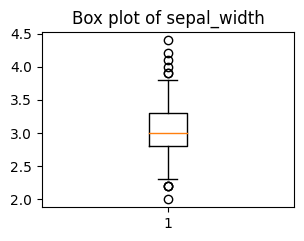

In [13]:
plt.figure(figsize = (15,5))

plt.subplot(2,4,1)
plt.boxplot(df["sepal_width"], whis = 1)
plt.title("Box plot of sepal_width")

plt.show()

In [14]:
from scipy.stats.mstats import winsorize

winsorized_sepal_width = winsorize(df['sepal_width'], (0.05, 0.05))

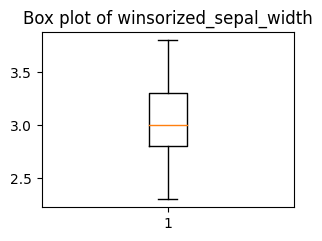

In [15]:
plt.figure(figsize = (15,5))

plt.subplot(2,4,1)
plt.boxplot(winsorized_sepal_width, whis = 1)
plt.title("Box plot of winsorized_sepal_width")

plt.show()

In [16]:
df['winsorized_sepal_width'] = winsorized_sepal_width

df = df.drop(['sepal_width'], axis=1)

In [17]:
numeric_columns = df.select_dtypes(['int32', 'float64']).columns

for col in numeric_columns:
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((df[col] > max_val)
                      | (df[col] < min_val))[0])), len((np.where((df[col] > max_val) |
                                                    (df[col] < min_val))[0]))*100/1460))

Number of outliers for sepal_length is: 0 and it is 0.0 percent.
Number of outliers for petal_length is: 0 and it is 0.0 percent.
Number of outliers for petal_width is: 0 and it is 0.0 percent.
Number of outliers for winsorized_sepal_width is: 0 and it is 0.0 percent.


<Axes: >

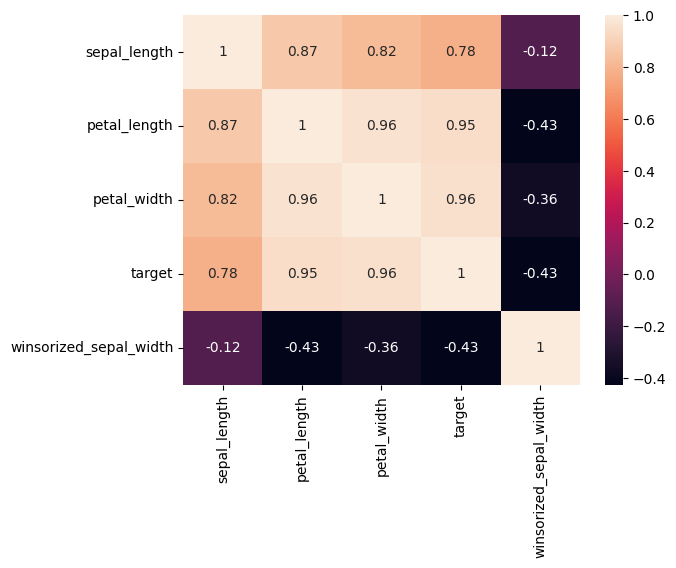

In [18]:
sns.heatmap(df.corr(), annot = True)

* There are intercorrelations between features. This will be explored further.

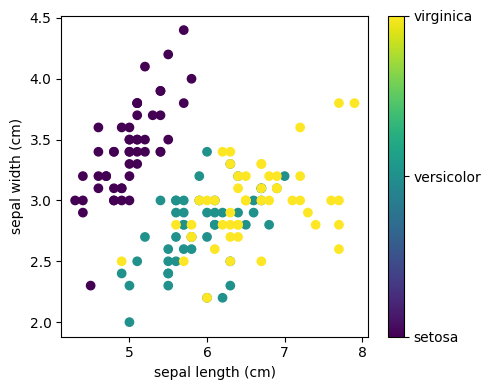

In [19]:
x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

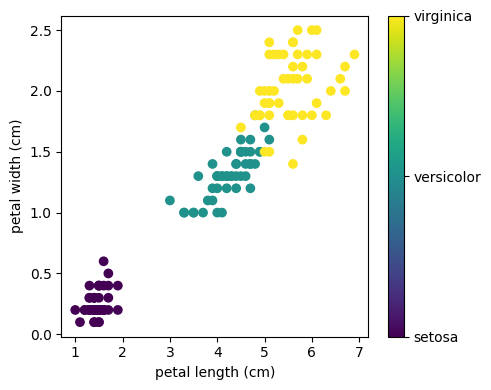

In [20]:
x_index = 2
y_index = 3

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

* The plots show that petal length and width are a better indicator of class due to the seperation of clusters versus sepal length and width.

In [21]:
# predictors (X) and target values (y)

X = df.copy()
y = X.pop('target')

In [22]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=25, stratify = y)

In [23]:
# Standardize the data

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Decision Tree

In [24]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [27]:
start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=7
)
decision_tree.fit(X, y)


score = cross_val_score(decision_tree, X, y, cv=10)

print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
#print('Mean:', score.mean(), '\nVariance:', score.std()*2)

Cross validation Score is  0.9466666666666667
--- 0.054965972900390625 seconds ---


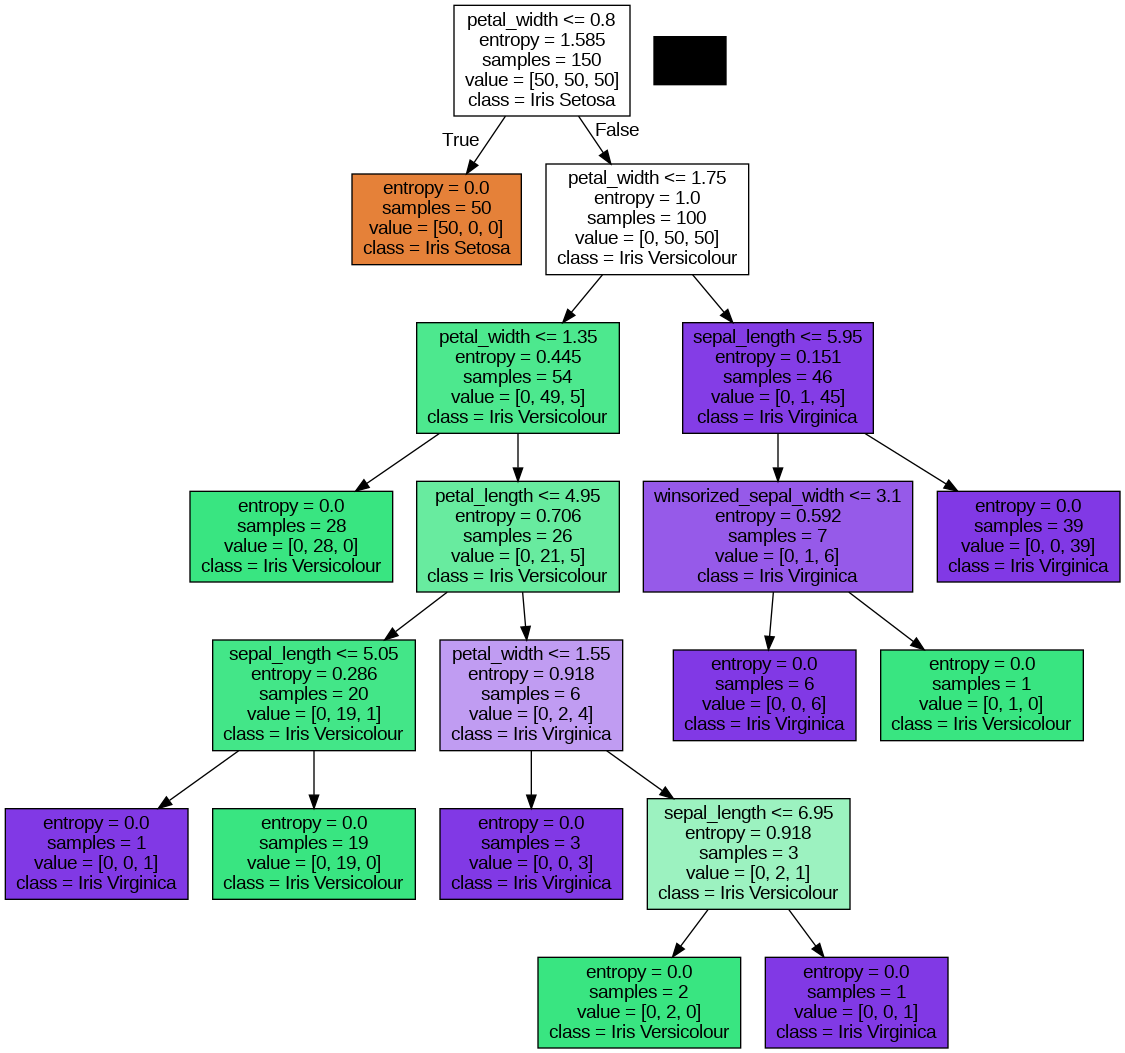

In [28]:
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forest

In [31]:
from sklearn import ensemble

start_time = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=4, n_jobs=-1)
rfc.fit(X, y)

score = cross_val_score(rfc, X, y, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))

Cross validation Score is  0.96
--- 0.2213442325592041 seconds ---


# Summary

* The Random Forest model had a slightly higher mean cross validation score (0.96 Vs 0.95)
* The decision tree model however was significantly faster (0.05 sec Vs 0.221 sec)